## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  14.046283  1172.061971  0.326921  6.255961   383.473786
1  49.327822  1750.858754  0.355571  8.113944   624.553017
2  13.334683  1609.750292  0.959099  5.204501  1543.918527
3  99.703869   229.981235  0.867601  6.494179   223.314480
4  30.800025  1458.660353  0.827640  5.347036  1207.833978


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9678688	total: 55.3ms	remaining: 55.2s
1:	learn: 0.9579500	total: 56ms	remaining: 27.9s
2:	learn: 0.9488894	total: 56.5ms	remaining: 18.8s
3:	learn: 0.9391981	total: 57ms	remaining: 14.2s
4:	learn: 0.9273915	total: 57.5ms	remaining: 11.4s
5:	learn: 0.9172128	total: 57.9ms	remaining: 9.59s
6:	learn: 0.9056485	total: 58.3ms	remaining: 8.27s
7:	learn: 0.8941114	total: 58.9ms	remaining: 7.3s
8:	learn: 0.8823147	total: 59.3ms	remaining: 6.53s
9:	learn: 0.8716448	total: 59.8ms	remaining: 5.92s
10:	learn: 0.8623041	total: 60.3ms	remaining: 5.42s
11:	learn: 0.8496857	total: 60.8ms	remaining: 5s
12:	learn: 0.8386244	total: 61.2ms	remaining: 4.65s
13:	learn: 0.8276492	total: 61.6ms	remaining: 4.34s
14:	learn: 0.8180099	total: 62.1ms	remaining: 4.08s
15:	learn: 0.8101540	total: 62.6ms	remaining: 3.85s
16:	learn: 0.8001931	total: 63.1ms	remaining: 3.65s
17:	learn: 0.7925902	total: 63.5ms	remaining: 3.46s
18:	learn: 0.7854058	total: 64.1ms	remaining: 3.31s


129:	learn: 0.2183238	total: 107ms	remaining: 716ms
130:	learn: 0.2160593	total: 107ms	remaining: 712ms
131:	learn: 0.2142723	total: 108ms	remaining: 708ms
132:	learn: 0.2121402	total: 108ms	remaining: 704ms
133:	learn: 0.2095916	total: 108ms	remaining: 701ms
134:	learn: 0.2078710	total: 109ms	remaining: 698ms
135:	learn: 0.2060302	total: 109ms	remaining: 694ms
136:	learn: 0.2041312	total: 110ms	remaining: 690ms
137:	learn: 0.2022254	total: 110ms	remaining: 687ms
138:	learn: 0.2000432	total: 111ms	remaining: 685ms
139:	learn: 0.1980706	total: 111ms	remaining: 682ms
140:	learn: 0.1961875	total: 111ms	remaining: 679ms
141:	learn: 0.1940971	total: 112ms	remaining: 675ms
142:	learn: 0.1924277	total: 112ms	remaining: 672ms
143:	learn: 0.1904699	total: 113ms	remaining: 670ms
144:	learn: 0.1882365	total: 113ms	remaining: 667ms
145:	learn: 0.1860132	total: 114ms	remaining: 664ms
146:	learn: 0.1842084	total: 114ms	remaining: 662ms
147:	learn: 0.1822969	total: 114ms	remaining: 659ms
148:	learn: 

312:	learn: 0.0437460	total: 185ms	remaining: 406ms
313:	learn: 0.0434118	total: 186ms	remaining: 406ms
314:	learn: 0.0431438	total: 186ms	remaining: 405ms
315:	learn: 0.0428850	total: 187ms	remaining: 404ms
316:	learn: 0.0426086	total: 187ms	remaining: 403ms
317:	learn: 0.0423651	total: 187ms	remaining: 402ms
318:	learn: 0.0421259	total: 188ms	remaining: 401ms
319:	learn: 0.0418909	total: 188ms	remaining: 400ms
320:	learn: 0.0416096	total: 189ms	remaining: 399ms
321:	learn: 0.0413662	total: 189ms	remaining: 398ms
322:	learn: 0.0411264	total: 190ms	remaining: 397ms
323:	learn: 0.0408240	total: 190ms	remaining: 396ms
324:	learn: 0.0406407	total: 190ms	remaining: 395ms
325:	learn: 0.0403983	total: 191ms	remaining: 394ms
326:	learn: 0.0401474	total: 191ms	remaining: 393ms
327:	learn: 0.0399648	total: 192ms	remaining: 393ms
328:	learn: 0.0397904	total: 192ms	remaining: 392ms
329:	learn: 0.0395507	total: 193ms	remaining: 391ms
330:	learn: 0.0393154	total: 193ms	remaining: 390ms
331:	learn: 

551:	learn: 0.0156520	total: 289ms	remaining: 234ms
552:	learn: 0.0156222	total: 289ms	remaining: 234ms
553:	learn: 0.0155523	total: 290ms	remaining: 233ms
554:	learn: 0.0155168	total: 290ms	remaining: 233ms
555:	learn: 0.0154905	total: 291ms	remaining: 232ms
556:	learn: 0.0154625	total: 291ms	remaining: 231ms
557:	learn: 0.0154339	total: 291ms	remaining: 231ms
558:	learn: 0.0153991	total: 292ms	remaining: 230ms
559:	learn: 0.0153710	total: 292ms	remaining: 230ms
560:	learn: 0.0152962	total: 293ms	remaining: 229ms
561:	learn: 0.0152619	total: 293ms	remaining: 228ms
562:	learn: 0.0152346	total: 293ms	remaining: 228ms
563:	learn: 0.0151609	total: 294ms	remaining: 227ms
564:	learn: 0.0150883	total: 294ms	remaining: 226ms
565:	learn: 0.0150546	total: 295ms	remaining: 226ms
566:	learn: 0.0149831	total: 295ms	remaining: 225ms
567:	learn: 0.0149095	total: 295ms	remaining: 225ms
568:	learn: 0.0148765	total: 296ms	remaining: 224ms
569:	learn: 0.0148067	total: 296ms	remaining: 223ms
570:	learn: 

737:	learn: 0.0097384	total: 367ms	remaining: 130ms
738:	learn: 0.0096945	total: 368ms	remaining: 130ms
739:	learn: 0.0096825	total: 368ms	remaining: 129ms
740:	learn: 0.0096427	total: 368ms	remaining: 129ms
741:	learn: 0.0096233	total: 369ms	remaining: 128ms
742:	learn: 0.0095842	total: 369ms	remaining: 128ms
743:	learn: 0.0095697	total: 370ms	remaining: 127ms
744:	learn: 0.0095228	total: 370ms	remaining: 127ms
745:	learn: 0.0094730	total: 371ms	remaining: 126ms
746:	learn: 0.0094349	total: 371ms	remaining: 126ms
747:	learn: 0.0094104	total: 372ms	remaining: 125ms
748:	learn: 0.0093720	total: 372ms	remaining: 125ms
749:	learn: 0.0093318	total: 373ms	remaining: 124ms
750:	learn: 0.0093081	total: 373ms	remaining: 124ms
751:	learn: 0.0092752	total: 373ms	remaining: 123ms
752:	learn: 0.0092428	total: 374ms	remaining: 123ms
753:	learn: 0.0092109	total: 374ms	remaining: 122ms
754:	learn: 0.0091714	total: 375ms	remaining: 122ms
755:	learn: 0.0091488	total: 375ms	remaining: 121ms
756:	learn: 

976:	learn: 0.0047468	total: 470ms	remaining: 11.1ms
977:	learn: 0.0047313	total: 471ms	remaining: 10.6ms
978:	learn: 0.0047162	total: 471ms	remaining: 10.1ms
979:	learn: 0.0046998	total: 472ms	remaining: 9.62ms
980:	learn: 0.0046849	total: 472ms	remaining: 9.14ms
981:	learn: 0.0046688	total: 472ms	remaining: 8.65ms
982:	learn: 0.0046543	total: 473ms	remaining: 8.18ms
983:	learn: 0.0046412	total: 473ms	remaining: 7.69ms
984:	learn: 0.0046269	total: 474ms	remaining: 7.21ms
985:	learn: 0.0046140	total: 474ms	remaining: 6.73ms
986:	learn: 0.0046000	total: 474ms	remaining: 6.25ms
987:	learn: 0.0045872	total: 475ms	remaining: 5.76ms
988:	learn: 0.0045735	total: 475ms	remaining: 5.28ms
989:	learn: 0.0045583	total: 476ms	remaining: 4.8ms
990:	learn: 0.0045448	total: 476ms	remaining: 4.32ms
991:	learn: 0.0045324	total: 476ms	remaining: 3.84ms
992:	learn: 0.0045184	total: 477ms	remaining: 3.36ms
993:	learn: 0.0045061	total: 477ms	remaining: 2.88ms
994:	learn: 0.0044930	total: 478ms	remaining: 2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

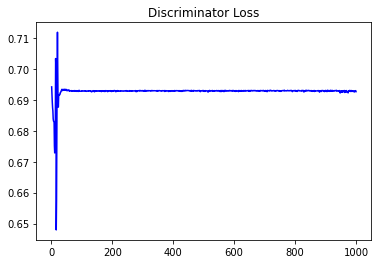

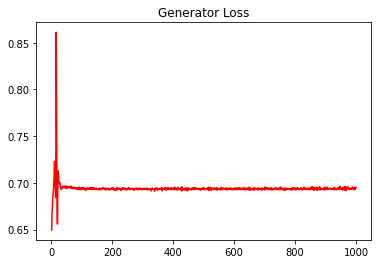

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.013499201603625706


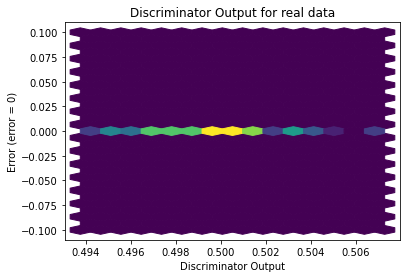

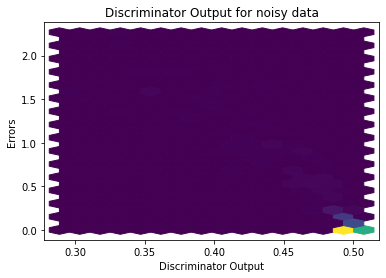

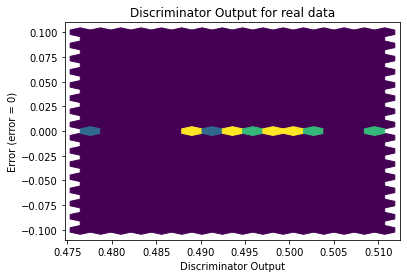

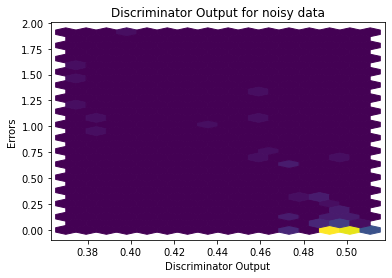

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


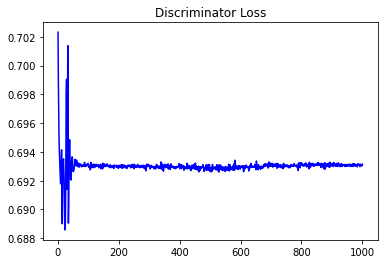

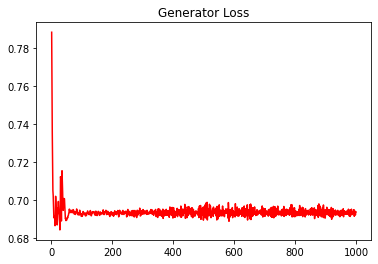

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.023713923811016443


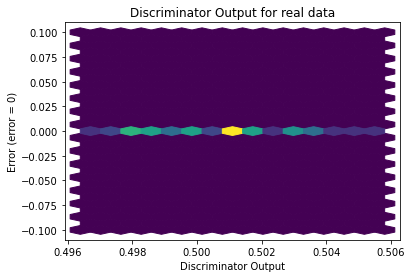

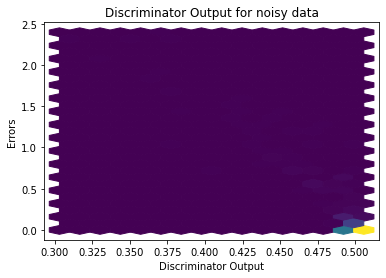

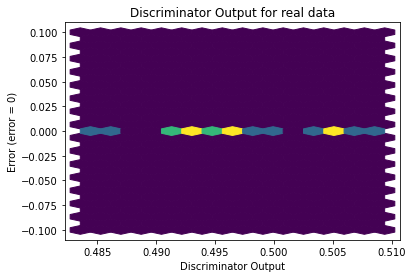

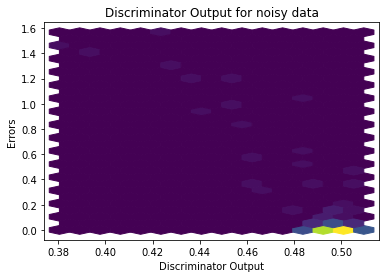

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2455]], requires_grad=True)
